In [59]:
pip install pandas statsmodels matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
# 1. Ler o arquivo CSV com parâmetros ajustados
# Use sep=';' (ou altere para o separador correto), thousands='.' e decimal=','
dados = pd.read_csv("vendas_distribuidoras_anp 1 (2)(diesel).csv", 
                    sep=';', 
                    thousands='.', 
                    decimal=',', 
                    encoding='latin1')  # Ajuste o encoding se necessário
print("Primeiras linhas do CSV:\n", dados.head())  # Verifique os dados carregados

Primeiras linhas do CSV:
   regiao  meses     2000     2001     2002     2003     2004     2005  \
0     df    1.0  23311.0  29320.0  30935.0  29295.0  24361.0  27746.0   
1     df    2.0  25968.0  27721.0  27585.0  28328.0  23477.0  27132.0   
2     df    3.0  24591.0  32150.0  32724.0  28048.0  30092.0  31147.0   
3     df    4.0  24976.0  32157.0  33863.0  31787.0  29434.0  31063.0   
4     df    5.0  27225.0  34123.0  34484.0  32476.0  30443.0  31340.0   

      2006     2007  ...     2012     2013     2014     2015     2016  \
0  28110.0  26414.0  ...  27828.0  31350.0  33989.0  35430.0  28797.0   
1  26344.0  25574.0  ...  31540.0  30453.0  34969.0  31957.0  31339.0   
2  31039.0  31875.0  ...  36203.0  34268.0  35643.0  37279.0  34351.0   
3  28794.0  30287.0  ...  33602.0  36088.0  36849.0  36476.0  32501.0   
4  32818.0  32274.0  ...  36364.0  36738.0  39003.0  36793.0  32512.0   

      2017     2018     2019     2020     2021  
0  27829.0  26758.0  27482.0  28437.0  28659.0 

In [63]:
# 2. Transformar o DataFrame de formato largo para longo
dados_long = pd.melt(dados, 
                     id_vars=['regiao', 'meses'],  # Ajuste os nomes das colunas se diferente
                     var_name='Ano', 
                     value_name='Volume')
print("\nApós melt:\n", dados_long.head())



Após melt:
   regiao  meses   Ano   Volume
0     df    1.0  2000  23311.0
1     df    2.0  2000  25968.0
2     df    3.0  2000  24591.0
3     df    4.0  2000  24976.0
4     df    5.0  2000  27225.0


In [ ]:
# 3. Limpar a coluna 'Volume'
# Converter para string, remover espaços extras e converter para float
dados_long['Volume'] = dados_long['Volume'].astype(str).str.strip()  # Remove espaços
dados_long['Volume'] = pd.to_numeric(dados_long['Volume'], errors='coerce')  # Converte para float, NaN para erros

In [65]:
# 4. Remover linhas com valores inválidos em 'Volume'
dados_long = dados_long.dropna(subset=['Volume'])
print("\nApós limpeza de 'Volume':\n", dados_long.head())
print("Formato dos dados:", dados_long.shape)


Após limpeza de 'Volume':
   regiao  meses   Ano   Volume
0     df    1.0  2000  23311.0
1     df    2.0  2000  25968.0
2     df    3.0  2000  24591.0
3     df    4.0  2000  24976.0
4     df    5.0  2000  27225.0
Formato dos dados: (2304, 4)


In [66]:
# 5. Mapear os meses para nomes em português
month_map = {
    '1.0': 'janeiro', '2.0': 'fevereiro', '3.0': 'março', '4.0': 'abril',
    '5.0': 'maio', '6.0': 'junho', '7.0': 'julho', '8.0': 'agosto',
    '9.0': 'setembro', '10.0': 'outubro', '11.0': 'novembro', '12.0': 'dezembro'
}
dados_long['meses'] = dados_long['meses'].astype(str).map(month_map)
dados_long = dados_long.dropna(subset=['meses'])

In [67]:
# 6. Converter meses para inglês (necessário para pd.to_datetime)
english_month_map = {
    'janeiro': 'January', 'fevereiro': 'February', 'março': 'March', 'abril': 'April',
    'maio': 'May', 'junho': 'June', 'julho': 'July', 'agosto': 'August',
    'setembro': 'September', 'outubro': 'October', 'novembro': 'November', 'dezembro': 'December'
}
dados_long['meses_en'] = dados_long['meses'].map(english_month_map)

In [68]:
# 7. Criar a coluna de data
dados_long['Data'] = pd.to_datetime(dados_long['meses_en'] + ' ' + dados_long['Ano'], 
                                    format='%B %Y', 
                                    errors='coerce')
dados_long = dados_long.dropna(subset=['Data'])

In [69]:
# 8. Agrupar por 'Data' e somar 'Volume'
serie_total = dados_long.groupby('Data')['Volume'].sum()
print("\nSérie temporal total:\n", serie_total.head())


Série temporal total:
 Data
2000-01-01    3837559.0
2000-02-01    4284017.0
2000-03-01    4206052.0
2000-04-01    4283744.0
2000-05-01    4424758.0
Name: Volume, dtype: float64


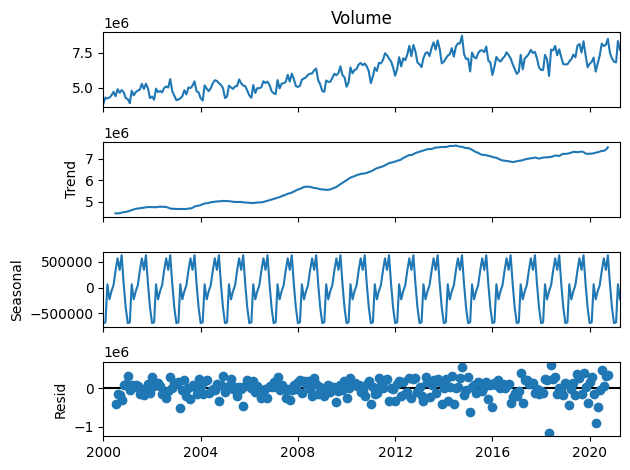

In [71]:
# 9. Verificar se há dados suficientes e realizar a decomposição sazonal
if len(serie_total) >= 24:
    resultado = seasonal_decompose(serie_total, model='additive', period=12)
    resultado.plot()
    plt.show()
else:
    print(f"A série temporal tem apenas {len(serie_total)} observações. São necessárias pelo menos 24.")

In [73]:
# 10. Agrupar por estado e por data
dados_estados = dados_long.groupby(['regiao', 'Data'])['Volume'].sum().reset_index()



Analisando o estado: br


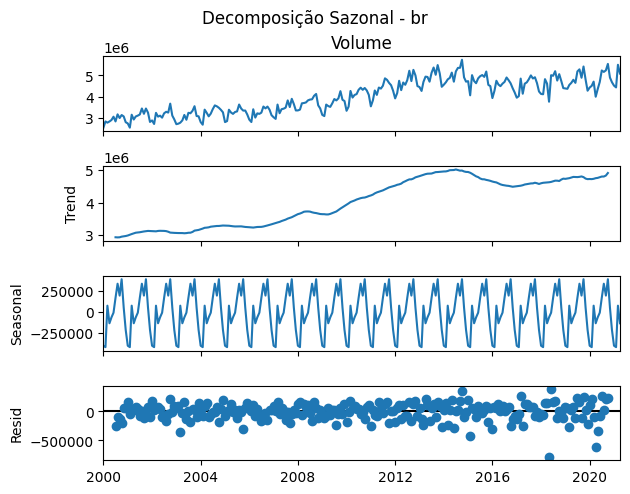


Analisando o estado: df


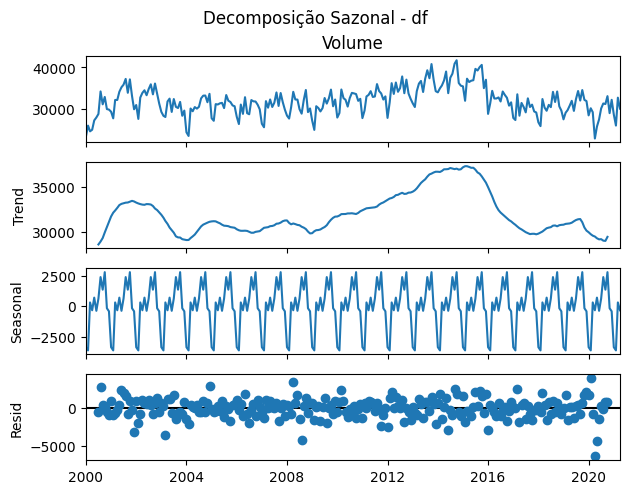


Analisando o estado: go


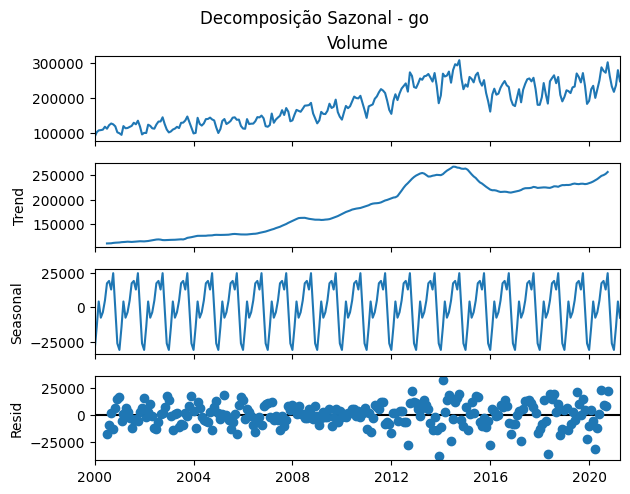


Analisando o estado: ma


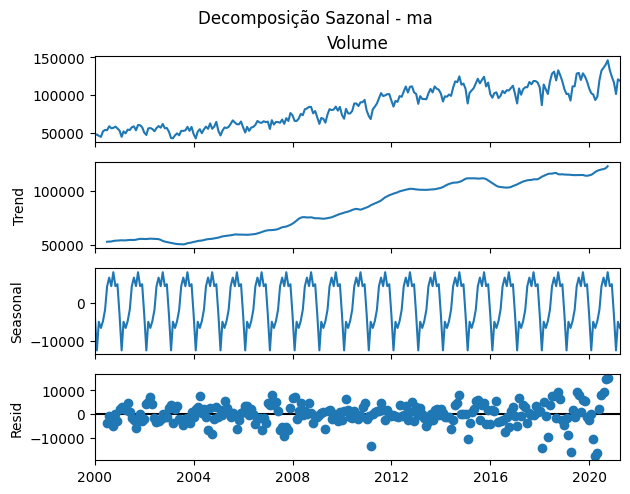


Analisando o estado: mg


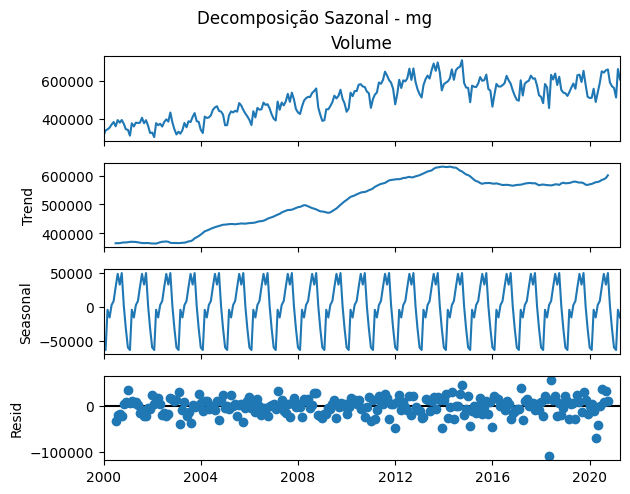


Analisando o estado: mt


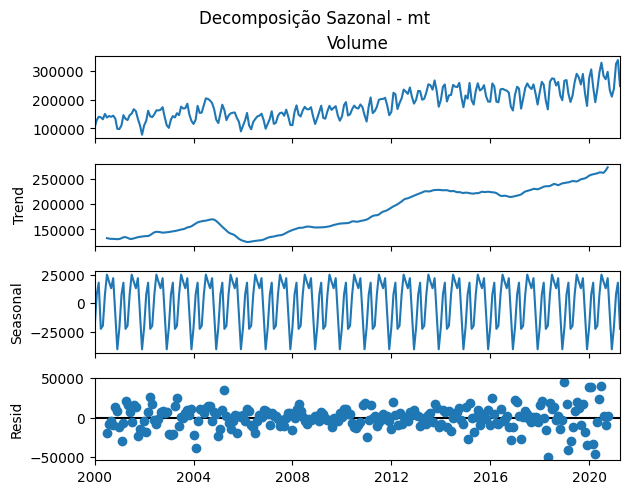


Analisando o estado: pa


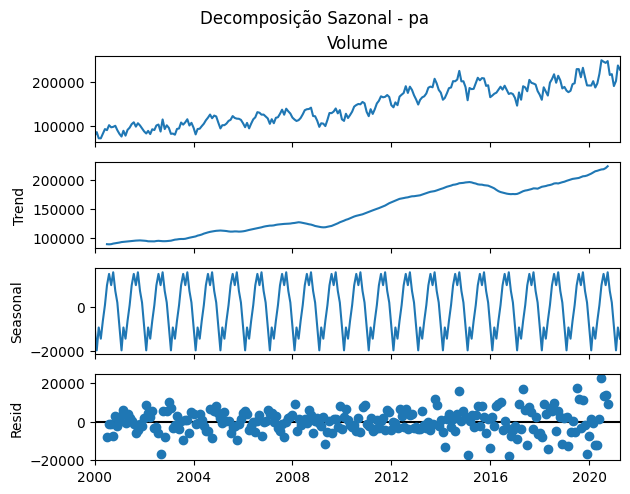


Analisando o estado: sp


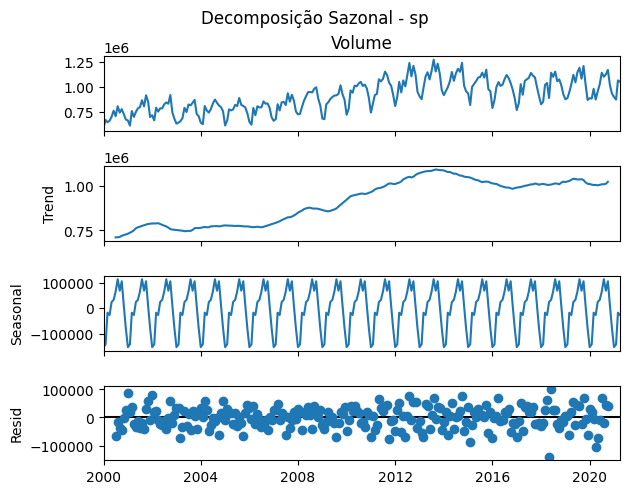


Analisando o estado: to


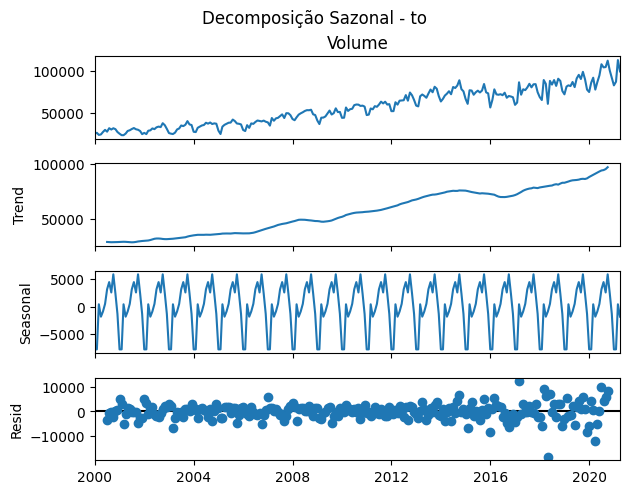

In [74]:
# 11. Iterar sobre cada estado e realizar a decomposição sazonal
estados = dados_estados['regiao'].unique()
for estado in estados:
    print(f"\nAnalisando o estado: {estado}")
    
    # Filtrar os dados para o estado atual
    serie_estado = dados_estados[dados_estados['regiao'] == estado].set_index('Data')['Volume']
    
    # Verificar se há dados suficientes para a decomposição
    if len(serie_estado) >= 24:  # Mínimo de 24 observações para período mensal
        resultado = seasonal_decompose(serie_estado, model='additive', period=12)
        
        # Plotar os resultados
        resultado.plot()
        plt.suptitle(f"Decomposição Sazonal - {estado}", y=1.02)  # Título do gráfico
        plt.show()
    else:
        print(f"Dados insuficientes para realizar a decomposição no estado: {estado}")